In [4]:
from sentinelhub import (
    SHConfig,
    DataCollection,
    SentinelHubCatalog,
    SentinelHubRequest,
    SentinelHubStatistical,
    BBox,
    bbox_to_dimensions,
    CRS,
    MimeType,
    Geometry,
)

from PIL import Image
import numpy as np
import os

import geopandas as gpd
from shapely.geometry import box

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import box
import cartopy
from utils import plot_image

In [5]:
# Only run this cell if you have not created a configuration.

config = SHConfig()
config.sh_client_id = "sh-84d21c38-65f5-410d-9267-b1db4ba47b41"
config.sh_client_secret = "7ykprUj53bYD42W30gevmHFnI4U5y75M"
config.sh_token_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
config.sh_base_url = "https://sh.dataspace.copernicus.eu"
# config.save("cdse")

In [13]:
catalog = SentinelHubCatalog(config=config)
resolution = 10

In [12]:
def plot_aoi_box(aoi_coords_wgs84, show_bbox=True, bbox_color='red', map_title="AOI Map"):
    """
    Plots a map with an optional bounding box for a given AOI.

    Parameters:
    - aoi_coords_wgs84: List of [min_lon, min_lat, max_lon, max_lat] for the AOI
    - show_bbox: Boolean to toggle displaying the bounding box (default: True)
    - bbox_color: Color of the bounding box (default: 'red')
    - map_title: Title of the map (default: "AOI Map")
    """
    # Create figure and axis with PlateCarree projection
    fig, ax = plt.subplots(figsize=(10, 10), dpi=200, subplot_kw={'projection': ccrs.PlateCarree()})

    # Add map features (land, coastline, borders)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")

    # Manually set x and y limits to center the map on AOI
    ax.set_xlim(aoi_coords_wgs84[0] - 0.2, aoi_coords_wgs84[2] + 0.2)  # Expand longitude range slightly
    ax.set_ylim(aoi_coords_wgs84[1] - 0.2, aoi_coords_wgs84[3] + 0.2)  # Expand latitude range slightly

    # Create the bounding box as a Polygon
    bbox = box(aoi_coords_wgs84[0], aoi_coords_wgs84[1], aoi_coords_wgs84[2], aoi_coords_wgs84[3])

    # Optionally display the bounding box in red
    if show_bbox:
        ax.add_geometries([bbox], crs=ccrs.PlateCarree(), facecolor='none', edgecolor=bbox_color, linewidth=2)

    # Add a title
    plt.title(map_title, fontsize=14)

    # Show the plot
    plt.show()


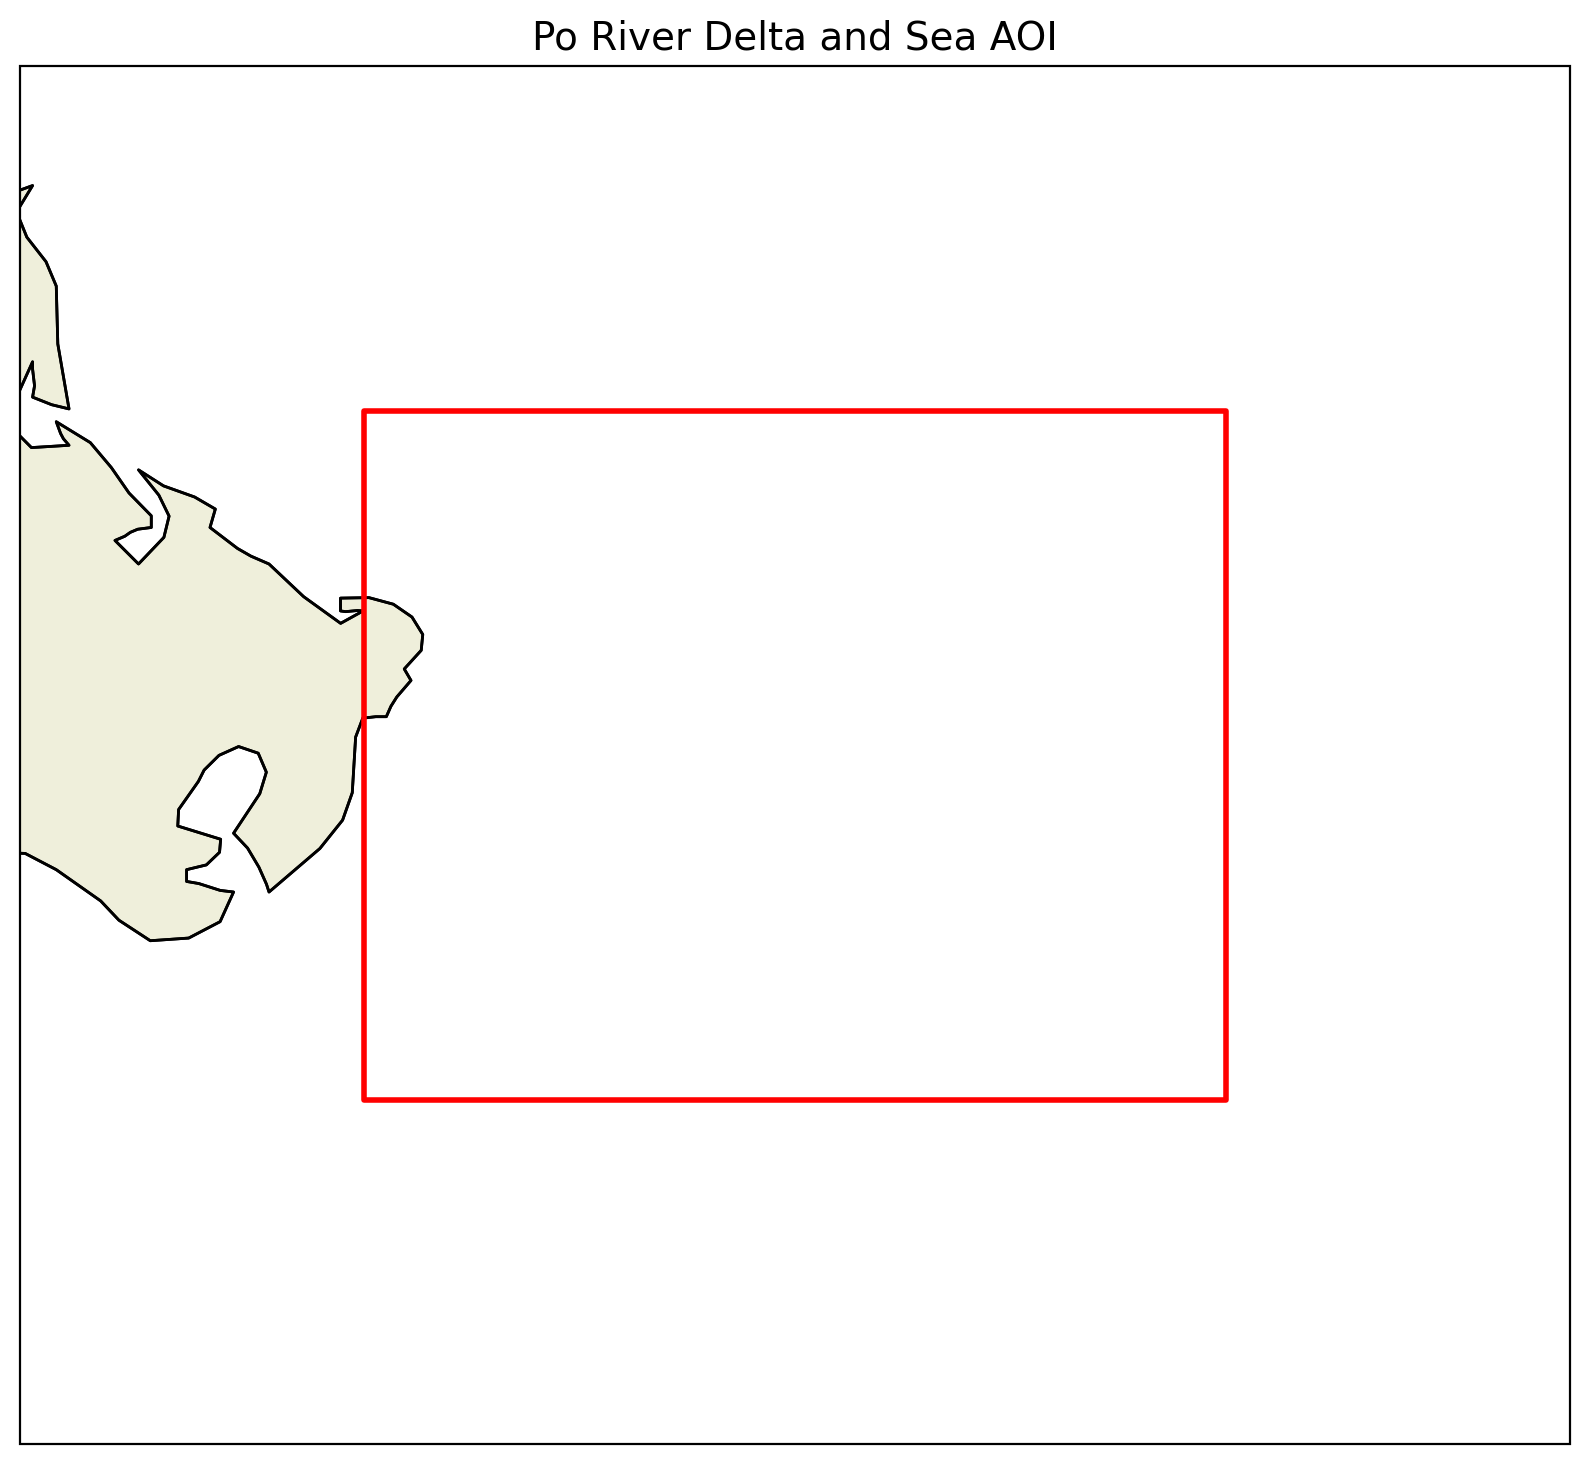

In [14]:
# Define AOI coordinates (min_lon, min_lat, max_lon, max_lat)
aoi_coords_wgs84 = [12.5, 44.7, 13.0, 45.1]

# Call the function to plot the map with the bounding box shown
plot_aoi_box(aoi_coords_wgs84, show_bbox=True, bbox_color='red', map_title="Po River Delta and Sea AOI")


In [ ]:
def plot_aoi_box(aoi_coords_wgs84, show_bbox=True, bbox_color='red', map_title="AOI Map"):
    """
    Plots a map with an optional bounding box for a given AOI.

    Parameters:
    - aoi_coords_wgs84: List of [min_lon, min_lat, max_lon, max_lat] for the AOI
    - show_bbox: Boolean to toggle displaying the bounding box (default: True)
    - bbox_color: Color of the bounding box (default: 'red')
    - map_title: Title of the map (default: "AOI Map")
    """
    # Create figure and axis with PlateCarree projection
    fig, ax = plt.subplots(figsize=(10, 10), dpi=200, subplot_kw={'projection': ccrs.PlateCarree()})

    # Add map features (land, coastline, borders)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")

    # Manually set x and y limits to center the map on AOI
    ax.set_xlim(aoi_coords_wgs84[0] - 0.2, aoi_coords_wgs84[2] + 0.2)  # Expand longitude range slightly
    ax.set_ylim(aoi_coords_wgs84[1] - 0.2, aoi_coords_wgs84[3] + 0.2)  # Expand latitude range slightly

    # Create the bounding box as a Polygon
    bbox = box(aoi_coords_wgs84[0], aoi_coords_wgs84[1], aoi_coords_wgs84[2], aoi_coords_wgs84[3])

    # Optionally display the bounding box in red
    if show_bbox:
        ax.add_geometries([bbox], crs=ccrs.PlateCarree(), facecolor='none', edgecolor=bbox_color, linewidth=2)

    # Add a title
    plt.title(map_title, fontsize=14)

    # Show the plot
    plt.show()


In [ ]:
# Define AOI coordinates (min_lon, min_lat, max_lon, max_lat)
aoi_coords_wgs84 = [12.5, 44.7, 13.0, 45.1]

# Call the function to plot the map with the bounding box shown
plot_aoi_box(aoi_coords_wgs84, show_bbox=True, bbox_color='red', map_title="Po River Delta and Sea AOI")


In [ ]:


results

In [ ]:
print(f"Returned results length: {len(results)}")  # Should match number of images


In [ ]:
evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A.define_from(
                name="s2l2a", service_url="https://sh.dataspace.copernicus.eu"
            ),
            time_interval=time_interval,
            other_args={"dataFilter": {"mosaickingOrder": "leastCC"}},
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=aoi_bbox,
    size=aoi_size,
    config=config,
)

In [ ]:
true_color_imgs = []

# Loop through each result to fetch the corresponding image
for result in results:
    timestamp = result["properties"]["datetime"]
    print(f"Fetching image for timestamp: {timestamp}")

    # Request for a single image corresponding to the timestamp
    request_true_color = SentinelHubRequest(
        evalscript=evalscript_true_color,
        input_data=[
            SentinelHubRequest.input_data(
                data_collection=DataCollection.SENTINEL2_L2A.define_from(
                    name="s2l2a", service_url="https://sh.dataspace.copernicus.eu"
                ),
                time_interval=(timestamp, timestamp),  # Use specific timestamp for each result
                other_args={"dataFilter": {"mosaickingOrder": "leastCC"}},
            )
        ],
        responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
        bbox=aoi_bbox,
        size=aoi_size,
        config=config,
    )

    # Get the data (the image) and append to the list
    image = request_true_color.get_data()
    
    # Since get_data() returns a list of images, take the first one
    true_color_imgs.append(image[0])  # Append the first image (or modify as needed)
    
    print(f"Fetched and stored image for {timestamp}")




In [9]:
from sentinelhub import SentinelHubRequest, DataCollection, MimeType, BBox, CRS
import os
import numpy as np
from PIL import Image

def download_sentinel_images(aoi_coords_wgs84, time_interval, output_dir="Images", resolution=10, max_size=2500):
    """
    Downloads Sentinel-2 true color images for a given AOI and time range.

    Parameters:
    - aoi_coords_wgs84: list of [min_lon, min_lat, max_lon, max_lat] (AOI bounding box)
    - time_interval: tuple of (start_date, end_date) in 'YYYY-MM-DD' format
    - output_dir: Directory to save the images (default: 'Po_Images')
    - resolution: Spatial resolution in meters per pixel (default: 10m)
    - max_size: Maximum image size (Sentinel Hub limit: 2500 pixels)
    """
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Define AOI Bounding Box
    aoi_bbox = BBox(bbox=aoi_coords_wgs84, crs=CRS.WGS84)
    aoi_size = bbox_to_dimensions(aoi_bbox, resolution=resolution)
    aoi_size = (min(aoi_size[0], max_size), min(aoi_size[1], max_size))  # Limit size

    # Search for available Sentinel-2 images
    search_iterator = catalog.search(
        DataCollection.SENTINEL2_L2A,
        bbox=aoi_bbox,
        time=time_interval,
        fields={"include": ["id", "properties.datetime"], "exclude": []},
    )

    results = list(search_iterator)
    print(f"Total number of results: {len(results)}")

    if not results:
        print("No images found for the given AOI and time interval.")
        return []

    # Define SentinelHub evalscript for true color imagery
    evalscript_true_color = """
        //VERSION=3
        function setup() {
            return { input: [{ bands: ["B02", "B03", "B04"] }], output: { bands: 3 } };
        }
        function evaluatePixel(sample) {
            return [sample.B04, sample.B03, sample.B02];
        }
    """

    true_color_imgs = []

    # Loop through results to fetch corresponding images
    for result in results:
        timestamp = result["properties"]["datetime"]
        print(f"Fetching image for timestamp: {timestamp}")

        # Request the image
        request_true_color = SentinelHubRequest(
            evalscript=evalscript_true_color,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L2A.define_from(
                        name="s2l2a", service_url="https://sh.dataspace.copernicus.eu"
                    ),
                    time_interval=(timestamp, timestamp),
                    other_args={"dataFilter": {"mosaickingOrder": "leastCC"}},
                )
            ],
            responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
            bbox=aoi_bbox,
            size=aoi_size,
            config=config,
        )

        # Get the image
        image_data = request_true_color.get_data()

        if image_data:
            image = image_data[0]  # Extract the first image
            true_color_imgs.append(image)

            # Save the image
            formatted_timestamp = timestamp[:19].replace(":", "-")
            filename = os.path.join(output_dir, f"sentinel_image_{formatted_timestamp}.png")
            img = Image.fromarray(np.uint8(image))
            img.save(filename)

            print(f"Saved: {filename}")

    print(f"Total images downloaded: {len(true_color_imgs)}")
    return true_color_imgs  # Return the list of images

# Example usage
aoi_coords_wgs84 = [12.5, 44.7, 13.0, 45.1]  # Example coordinates for Po River Delta
time_interval = ("2024-03-01", "2024-03-10")  # Example time range

download_sentinel_images(aoi_coords_wgs84, time_interval)


Total number of results: 16
Fetching image for timestamp: 2024-03-10T10:08:23.784Z
Saved: Images/sentinel_image_2024-03-10T10-08-23.png
Fetching image for timestamp: 2024-03-10T10:08:20.627Z
Saved: Images/sentinel_image_2024-03-10T10-08-20.png
Fetching image for timestamp: 2024-03-10T10:08:08.879Z
Saved: Images/sentinel_image_2024-03-10T10-08-08.png
Fetching image for timestamp: 2024-03-10T10:08:06.303Z
Saved: Images/sentinel_image_2024-03-10T10-08-06.png
Fetching image for timestamp: 2024-03-08T10:18:25.583Z
Saved: Images/sentinel_image_2024-03-08T10-18-25.png
Fetching image for timestamp: 2024-03-08T10:18:21.776Z
Saved: Images/sentinel_image_2024-03-08T10-18-21.png
Fetching image for timestamp: 2024-03-08T10:18:11.029Z
Saved: Images/sentinel_image_2024-03-08T10-18-11.png
Fetching image for timestamp: 2024-03-08T10:18:07.337Z
Saved: Images/sentinel_image_2024-03-08T10-18-07.png
Fetching image for timestamp: 2024-03-05T10:08:28.688Z
Saved: Images/sentinel_image_2024-03-05T10-08-28.png


[array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[229, 227, 227],
         [227, 226, 225],
         [228, 226, 225],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[229, 227, 226],
         [228, 228, 225],
         [228, 227, 226],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[228, 226, 224],
         [228, 227, 226],
         [227, 227, 225],
         ...,
         [  0,   0,   0],
  

In [ ]:
# Nord Corsica

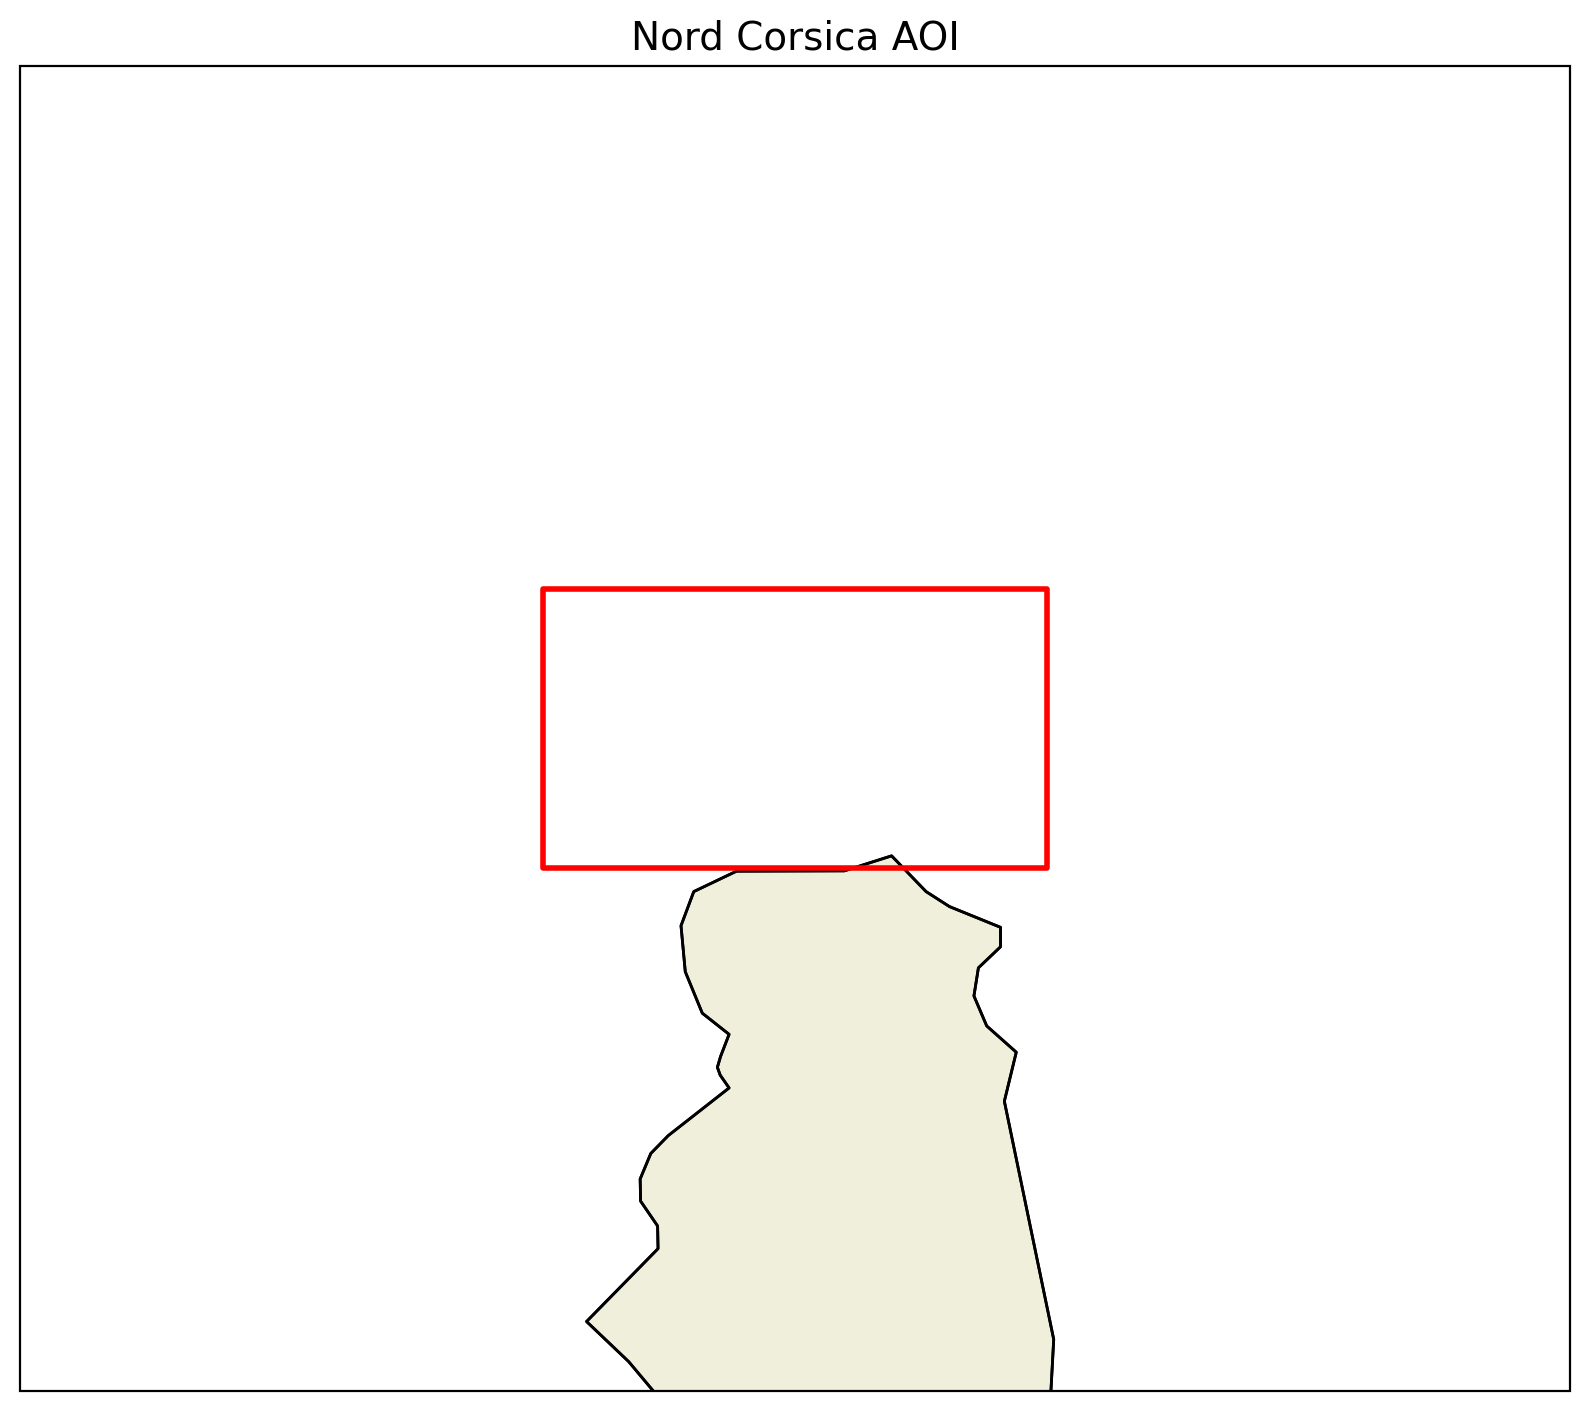

In [22]:
# Define AOI coordinates (min_lon, min_lat, max_lon, max_lat)
aoi_coords_wgs84 = [9.288940,43.012681,9.481888,43.119530] 

# Call the function to plot the map with the bounding box shown
plot_aoi_box(aoi_coords_wgs84, show_bbox=True, bbox_color='red', map_title="Nord Corsica AOI")

In [23]:
aoi_coords_wgs84 = [9.288940,43.012681,9.481888,43.119530] 
time_interval = ("2023-03-01", "2023-03-10")  # Example time range

download_sentinel_images(aoi_coords_wgs84, time_interval)

Total number of results: 4
Fetching image for timestamp: 2024-03-08T10:19:01.372Z
Saved: Images/sentinel_image_2024-03-08T10-19-01.png
Fetching image for timestamp: 2024-03-06T10:28:51.737Z
Saved: Images/sentinel_image_2024-03-06T10-28-51.png
Fetching image for timestamp: 2024-03-03T10:18:57.425Z
Saved: Images/sentinel_image_2024-03-03T10-18-57.png
Fetching image for timestamp: 2024-03-01T10:28:56.956Z
Saved: Images/sentinel_image_2024-03-01T10-28-56.png
Total images downloaded: 4


[array([[[137, 134, 133],
         [137, 133, 133],
         [136, 133, 133],
         ...,
         [ 60,  61,  65],
         [ 59,  62,  65],
         [ 59,  62,  64]],
 
        [[137, 135, 133],
         [137, 135, 133],
         [137, 134, 133],
         ...,
         [ 59,  61,  64],
         [ 60,  62,  65],
         [ 59,  63,  64]],
 
        [[138, 135, 133],
         [137, 134, 133],
         [137, 133, 134],
         ...,
         [ 59,  62,  65],
         [ 60,  62,  65],
         [ 59,  62,  65]],
 
        ...,
 
        [[156, 155, 156],
         [155, 155, 156],
         [156, 155, 157],
         ...,
         [ 57,  56,  64],
         [ 58,  56,  63],
         [ 57,  58,  61]],
 
        [[156, 155, 157],
         [156, 156, 157],
         [155, 155, 157],
         ...,
         [ 58,  56,  71],
         [ 58,  56,  70],
         [ 58,  57,  66]],
 
        [[156, 156, 159],
         [156, 155, 156],
         [155, 154, 156],
         ...,
         [ 56,  59,  74],
  

In [24]:
# gulf of Genova

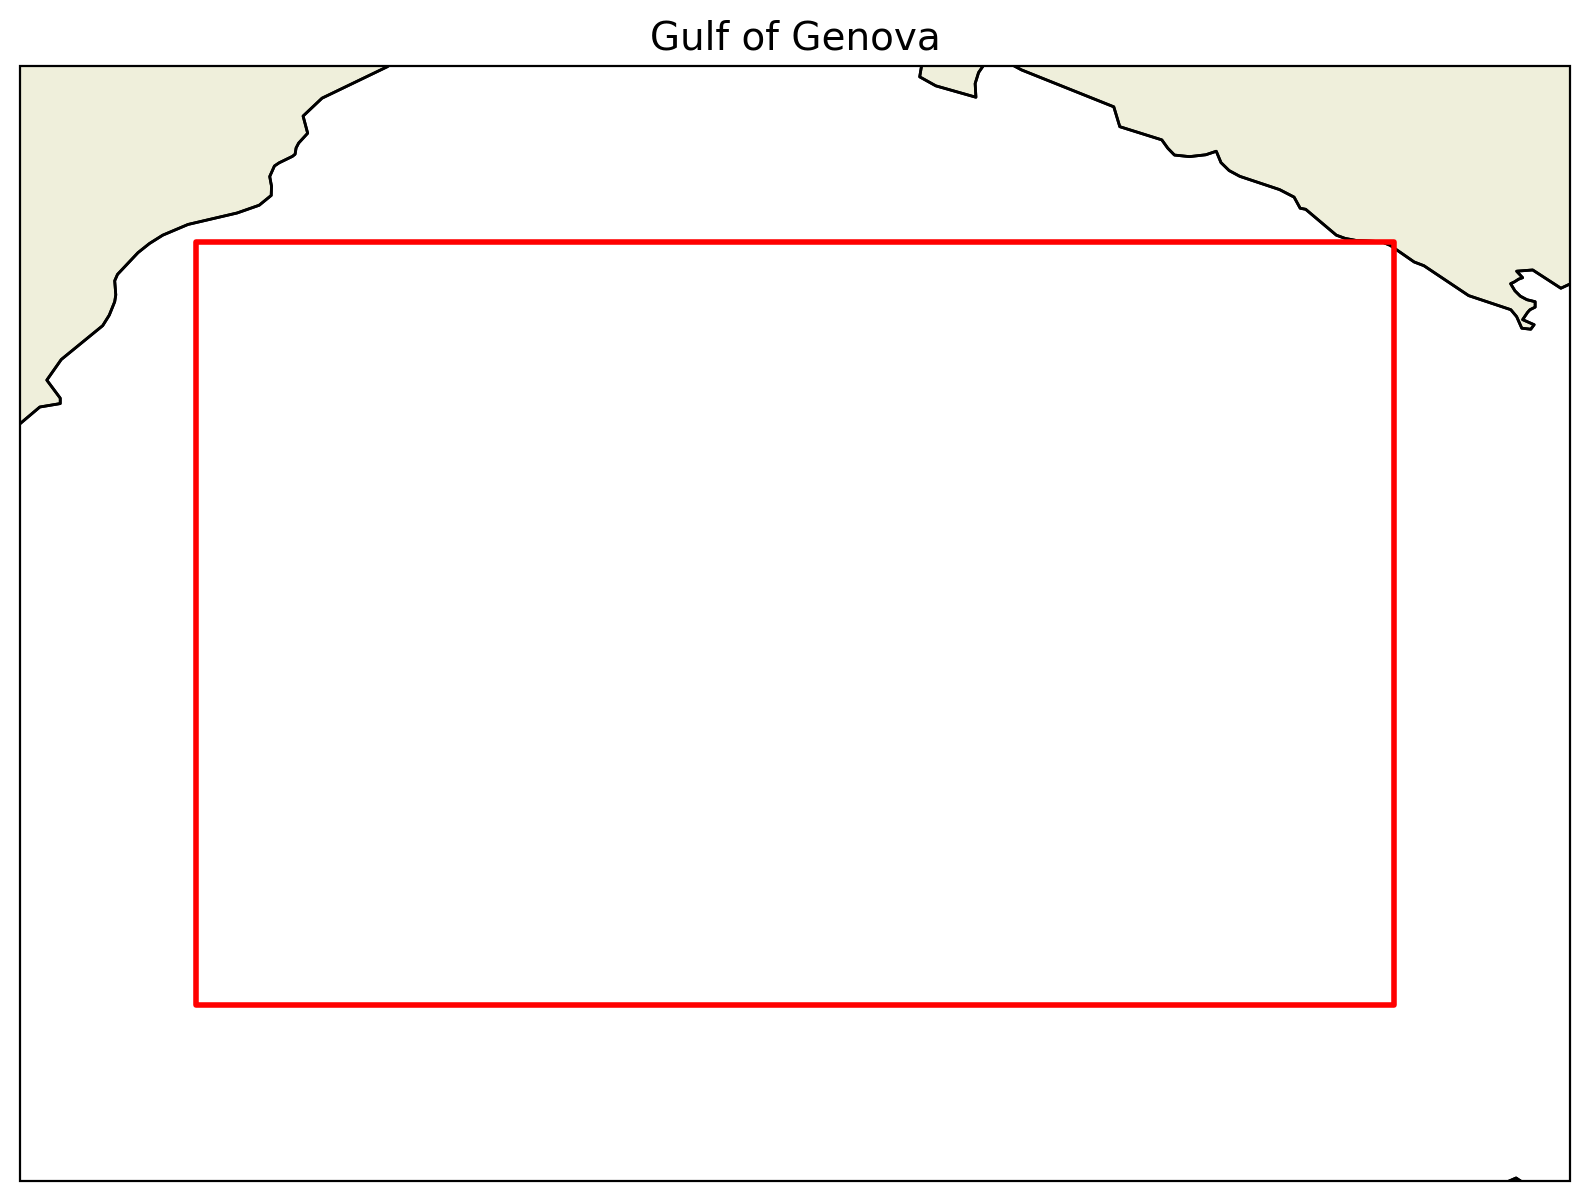

In [25]:
# Define AOI coordinates (min_lon, min_lat, max_lon, max_lat)
aoi_coords_wgs84 = [8.322144,43.271206,9.687195,44.140827]
# Call the function to plot the map with the bounding box shown
plot_aoi_box(aoi_coords_wgs84, show_bbox=True, bbox_color='red', map_title="Gulf of Genova")

In [ ]:
AOI = 'Gulf of Genova'
aoi_coords_wgs84 = [8.322144,43.271206,9.687195,44.140827] 
time_interval = ("2023-03-01", "2023-03-10")  # Example time range

download_sentinel_images(aoi_coords_wgs84, time_interval)

Total number of results: 25
Fetching image for timestamp: 2023-03-09T10:19:09.329Z
Saved: Images/sentinel_image_2023-03-09T10-19-09.png
Fetching image for timestamp: 2023-03-09T10:19:09.327Z
Saved: Images/sentinel_image_2023-03-09T10-19-09.png
Fetching image for timestamp: 2023-03-09T10:19:04.799Z
Saved: Images/sentinel_image_2023-03-09T10-19-04.png
Fetching image for timestamp: 2023-03-09T10:19:04.795Z
Saved: Images/sentinel_image_2023-03-09T10-19-04.png
Fetching image for timestamp: 2023-03-09T10:18:50.3Z
Saved: Images/sentinel_image_2023-03-09T10-18-50.png
Fetching image for timestamp: 2023-03-09T10:18:49.438Z
Saved: Images/sentinel_image_2023-03-09T10-18-49.png
Fetching image for timestamp: 2023-03-07T10:28:57.15Z
Saved: Images/sentinel_image_2023-03-07T10-28-57.png
Fetching image for timestamp: 2023-03-07T10:28:57.149Z
Saved: Images/sentinel_image_2023-03-07T10-28-57.png
Fetching image for timestamp: 2023-03-07T10:28:53.688Z
Saved: Images/sentinel_image_2023-03-07T10-28-53.png
Fet